In [1]:
import numpy as np
from gensim import corpora, models
import gensim
import csv
import _pickle as cPickle
from sklearn.externals import joblib
import bz2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load to memory
corpus = gensim.corpora.MmCorpus('data/eos/processed_corpus_EOS.mm')
dictionary = gensim.corpora.Dictionary.load_from_text('data/eos/dictionary_EOS.txt')
ldamodel = joblib.load('data/eos/LDAmodel_20_EOS.pkl')


In [4]:
%%time


color = []
for corpus_line in corpus:
    sorted_topic_line = list(sorted(ldamodel[corpus_line], key=lambda x: x[1], reverse=True))
    color.append(sorted_topic_line[0][0])
    
    
lda_output = []
for line in corpus:
    lda_output.append(ldamodel[line])
    
topics_data = np.zeros(shape=(len(corpus), 20))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]

CPU times: user 116 ms, sys: 240 ms, total: 356 ms
Wall time: 123 ms


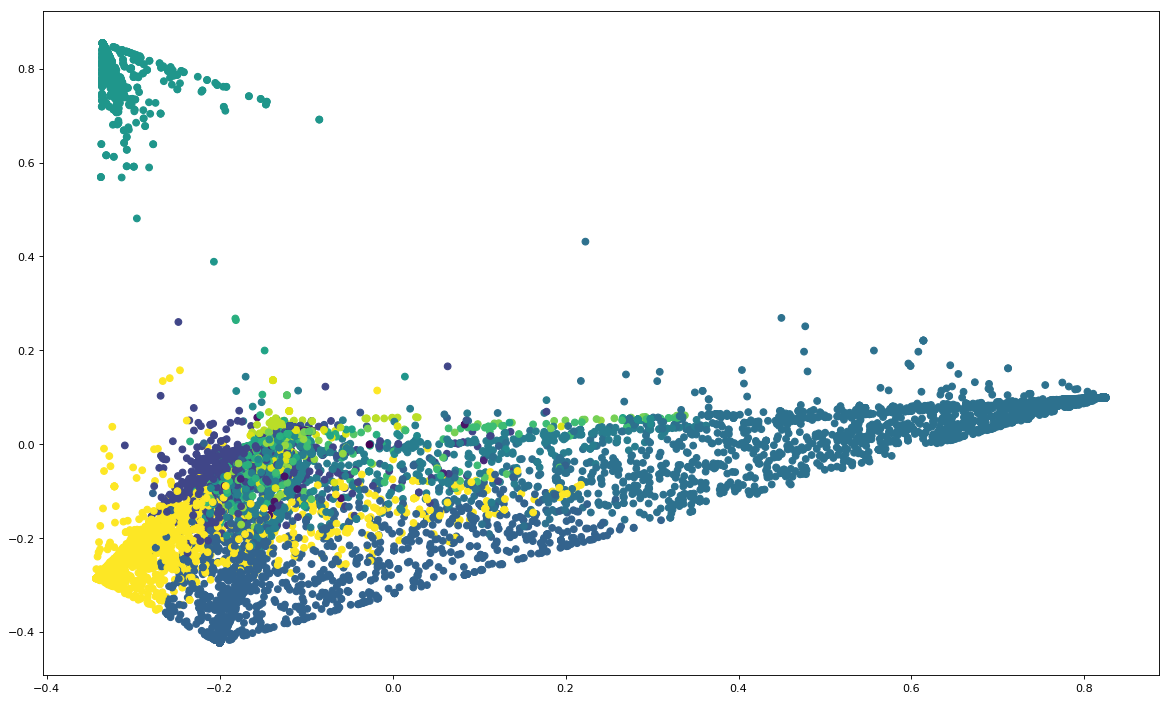

In [5]:
%%time

X_pca = PCA().fit_transform(topics_data)
figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color)

CPU times: user 136 ms, sys: 204 ms, total: 340 ms
Wall time: 115 ms


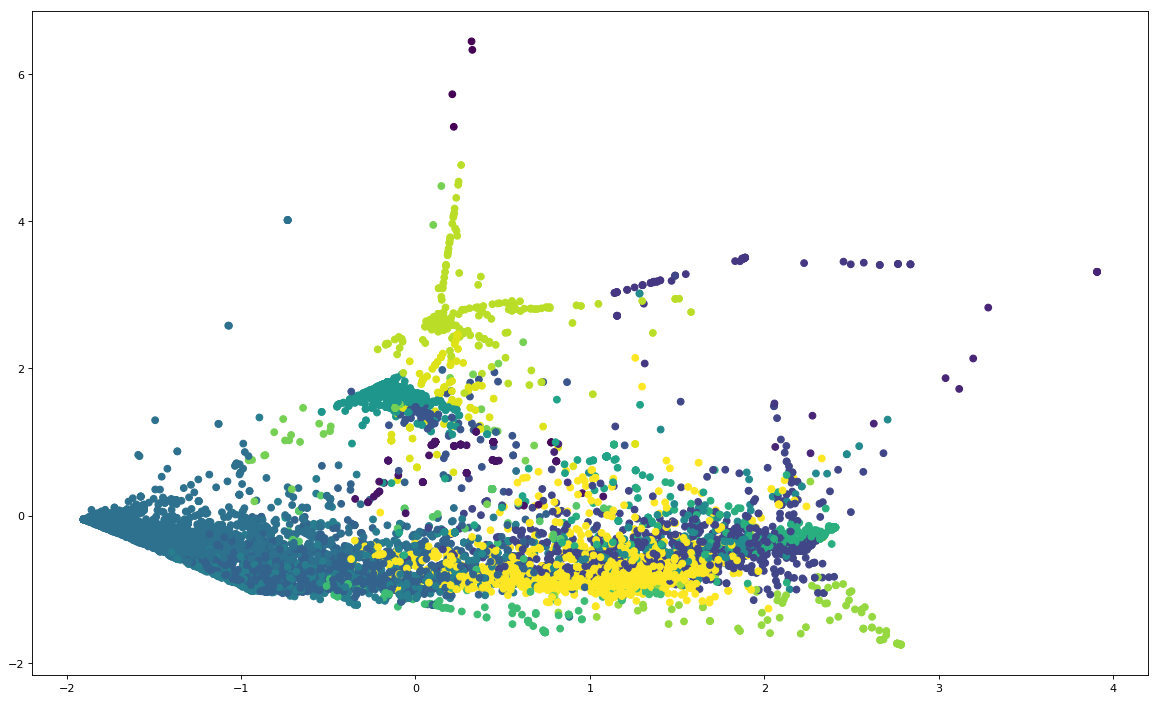

In [6]:
%%time


topics_data_norm  = stats.zscore(topics_data, axis=0)

X_pca = PCA().fit_transform(topics_data_norm )
figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color)

CPU times: user 4.2 s, sys: 320 ms, total: 4.52 s
Wall time: 4.1 s


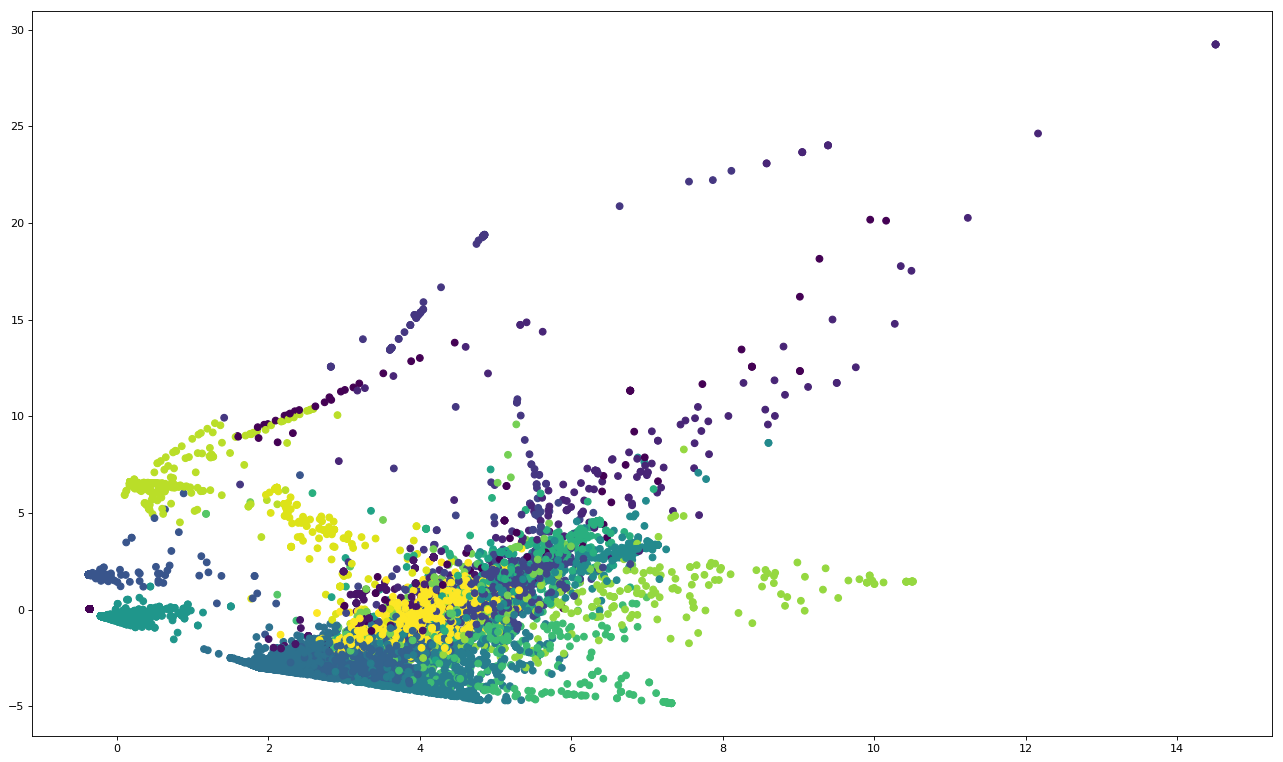

In [9]:
%%time

topics_data = np.zeros(shape=(100000, 20))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]
            
topics_data_norm = stats.zscore(topics_data, axis=0)

color = []
for line in topics_data_norm:
    color_number =[i for i, j in enumerate(line) if j == max(line)]
    color.append(int(color_number[0]))

X_pca = PCA().fit_transform(topics_data_norm )
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color)

# TSNE

In [14]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')


# doc_topic_distr = ldamodel.fit_transform()
# 20-D -> 2-D
# tsne_lda = tsne_model.fit_transform(doc_topic_distr)
